# Importing Libraries

In [ ]:
#Name :Deepali Geet 
#Roll No: 23 
#LP_IV
#Practical No :2

In [13]:
!pip install tensorflow

In [7]:
import tensorflow as tf # to create neural netwrok make it faster and easier
from tensorflow import keras # it act as a interface for tensorflow library use to create the deep learning models
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import random # library use for making prediction 
from keras.datasets import mnist #new

# Loading and preparing the data

In [8]:
#import tensorflow as tf 
fashiondata= tf.keras.datasets.mnist #by default present in keras lib
(x_train,y_train), (x_test,y_test) = fashiondata.load_data()#load data method returns the training and testing data

In [9]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)


In [10]:
len(x_train)

60000

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

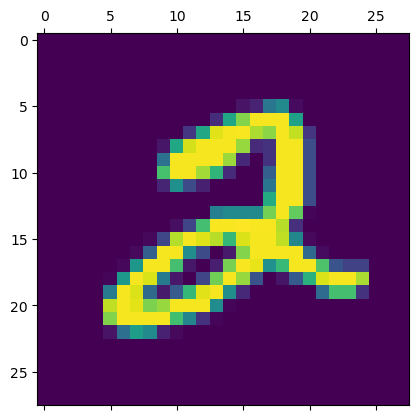

In [14]:
plt.matshow(x_train[5])#matshow method use to show img which is at 0 postion

In [15]:
#after loading the data we have to preprocess it for before feeding data to networkwe have to normalized it normalizing means scaling pixel intensities to range 0,1
#normalising input data helps to speed up the traing reduced the change 
x_train =x_train/255 
x_test =x_test/255

In [16]:
x_train[5] # here we normalized the data every value is in the 0 to 1 range

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
##model building we use sequential method  is used to create layer of network in one by one in sequential manner model which allows to build the model in sequential way
#1st is the input layer where we giving the 28 by 28 img i.e 2d img for input by using the flatten method we reshaping the img into 784 values i.e 1d 
#dense layer it insure each neuron in previous layer connected to evry neuron in next layer 128 neuron so 784 values passed to 128 neuron 
#with relu activation fun which is used in hidden layer y=max(0,x) gradient is always equal to one so we can pass max amount of error through network during backpropagation
#output layer for each class 0to 9 we using the softmax  activation fun is applied on op layer to turn the op into probability like values
#we have 10 classes
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])


In [20]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)#train the model using fit method in keras and tf

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7284 - loss: 1.0195 - val_accuracy: 0.9015 - val_loss: 0.3560
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9024 - loss: 0.3532 - val_accuracy: 0.9190 - val_loss: 0.2949
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9157 - loss: 0.2981 - val_accuracy: 0.9246 - val_loss: 0.2648
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9245 - loss: 0.2686 - val_accuracy: 0.9314 - val_loss: 0.2429
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9325 - loss: 0.2380 - val_accuracy: 0.9374 - val_loss: 0.2243


In [31]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("acc=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9284 - loss: 0.2523
loss=0.218
acc=0.939


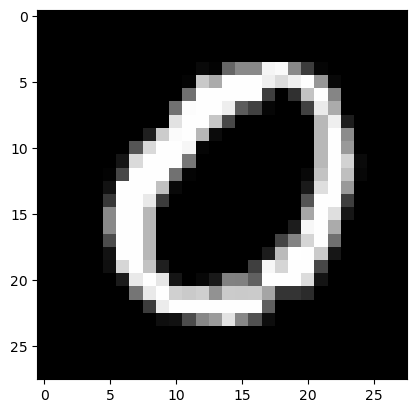

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


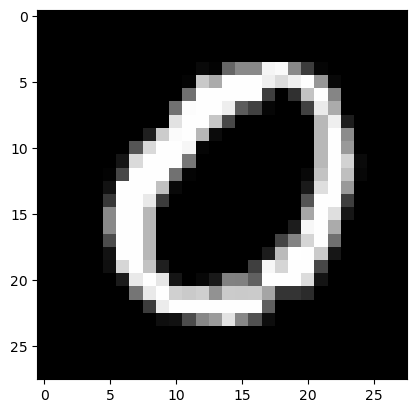

Predicted value: 0


In [34]:
#n=random.randint(0,9999)
#plt.imshow(x_test[n])
#plt.show()
#predicted_value=model.predict(x_test)
#plt.imshow(x_test[n])
#plt.show()
#print("predicted value",predicted_value[n])

n = random.randint(0, 9999)
plt.imshow(x_test[n], cmap='gray')
plt.show()
predicted_value = model.predict(x_test)
plt.imshow(x_test[n], cmap='gray')
plt.show()
print("Predicted value:", np.argmax(predicted_value[n]))


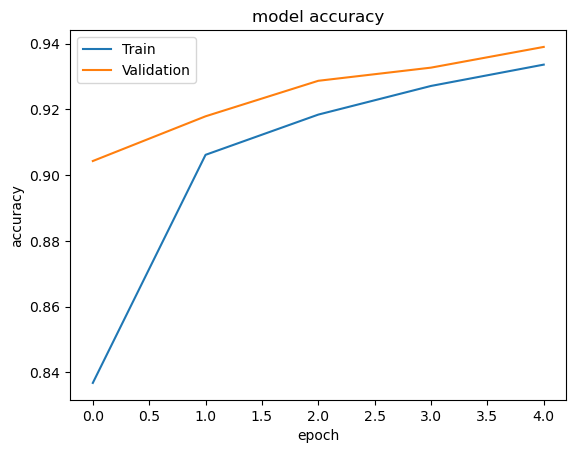

In [33]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Train","Validation"],loc="upper left")
plt.show()



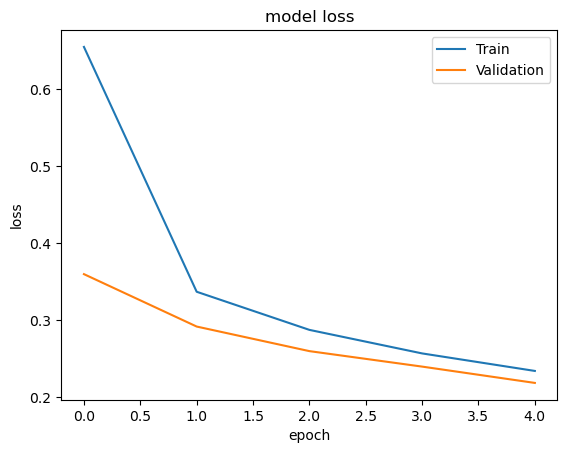

In [105]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()

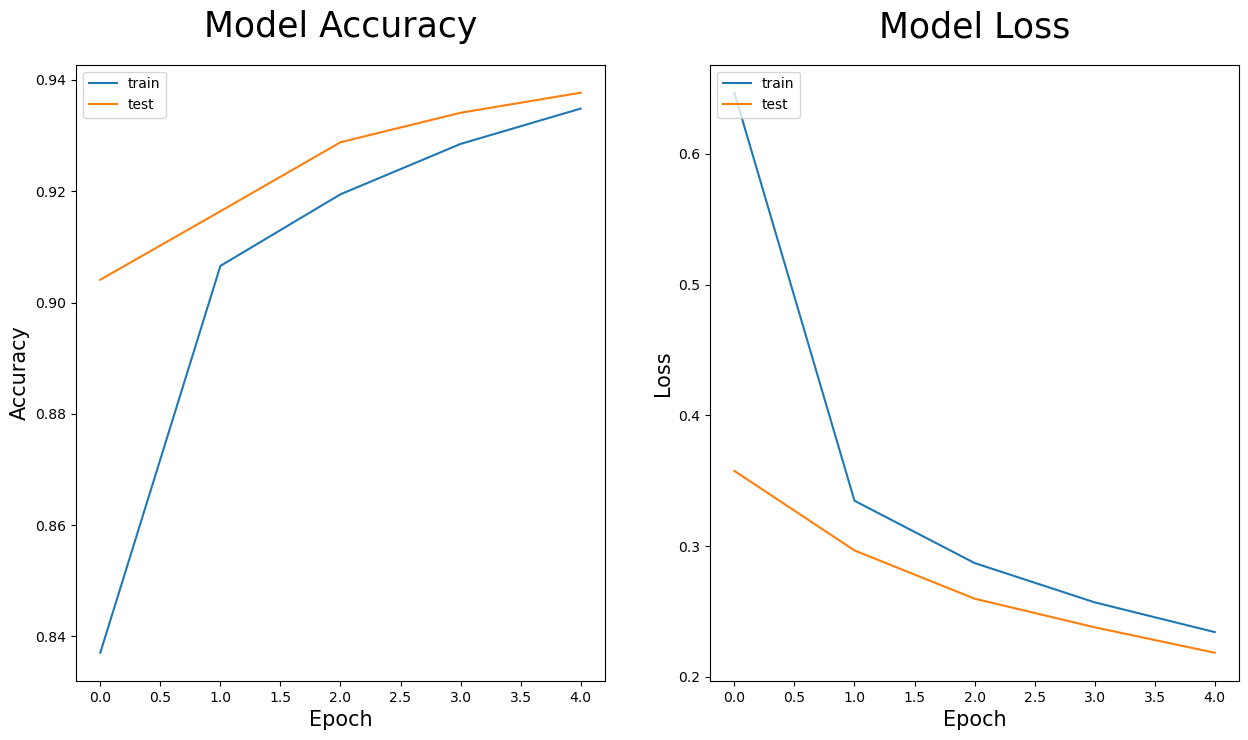

In [36]:
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()